### World Data Science Institute Internship
#### Simple Stock Prediction Model using Reinforcement Learning
#### Choosing which Stock to do Analysis on (Part 1)
#### Deep Reinforcement Learning with Microsoft Azure

By Brandon Oppong-Antwi



----

Important Notes on Installations:

Python Version: Python 3

Tensorflow Version: Tensorflow 2.3.0

Pytorch Version: Pytorch  1.6.0 with CUDA 101

Operating System: Windows 10


## Azure Preambles and Installation Requirements

Most of the requirements of python packages are already fulfilled on Azure. However, in order to create the graphs and the time series analysis we need to make sure we have the correct version of tensorflow running as well as important imports like glob for file handling, pandas for data frames, and numpy for muti-dimensional array analysis.

In [44]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
sns.set()

## Load the Dataset 
### The dataset comprises of common bank stocks that are the most well known in the 

In [45]:
PATH = 'Users/brandono/'
directory_names = ['ALLY.csv','AXP.csv','BAC.csv','BRK-B.csv','C.csv','CFG.csv','COF.csv','GS.csv','JPM.csv','JRVR.csv','SQ.csv','WFC.csv']
stocks = [PATH + s for s in directory_names]
stocks



['Users/brandono/ALLY.csv',
 'Users/brandono/AXP.csv',
 'Users/brandono/BAC.csv',
 'Users/brandono/BRK-B.csv',
 'Users/brandono/C.csv',
 'Users/brandono/CFG.csv',
 'Users/brandono/COF.csv',
 'Users/brandono/GS.csv',
 'Users/brandono/JPM.csv',
 'Users/brandono/JRVR.csv',
 'Users/brandono/SQ.csv',
 'Users/brandono/WFC.csv']

In [46]:
dfs = [pd.read_csv(s)[['Date', 'Close']] for s in stocks]
 

In [47]:
from functools import reduce
data = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs).iloc[:, 1:]
data.head()

,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y
0,30.879999,117.599998,27.049999,200.899994,63.419998,32.889999,85.349998,198.970001,108.559998,49.110001,61.130001,46.090000
1,31.780001,118.400002,27.490000,202.190002,64.279999,33.250000,85.959999,201.729996,109.870003,49.619999,61.169998,46.500000
2,32.529999,120.669998,28.120001,204.240005,66.339996,34.200001,88.320000,207.050003,112.370003,49.740002,63.020000,47.619999
3,32.570000,120.190002,27.730000,204.729996,65.970001,34.139999,88.190002,207.210007,112.610001,50.150002,62.000000,47.150002
4,34.200001,119.919998,28.629999,206.619995,68.790001,35.720001,90.959999,211.979996,115.400002,50.880001,61.470001,48.410000


In [48]:
returns = data.pct_change()
mean_daily_returns = returns.mean()
volatilities = returns.std()

In [49]:
mean_daily_returns * 252

Close_x    0.004630
Close_y    0.050676
Close_x    0.112989
Close_y    0.154481
Close_x    0.010148
Close_y    0.050412
Close_x    0.030203
Close_y    0.180138
Close_x    0.065268
Close_y    0.159872
Close_x    1.211933
Close_y   -0.460666
dtype: float64

In [50]:
volatilities * 252

Close_x    11.663286
Close_y     9.327744
Close_x     8.758225
Close_y     5.335806
Close_x    10.220498
Close_y    11.237036
Close_x    10.850284
Close_y     7.991605
Close_x     8.129819
Close_y     8.837846
Close_x    10.693608
Close_y     9.117315
dtype: float64

In [51]:
combine = pd.DataFrame({'returns': mean_daily_returns * 252,
                       'volatility': volatilities * 252})

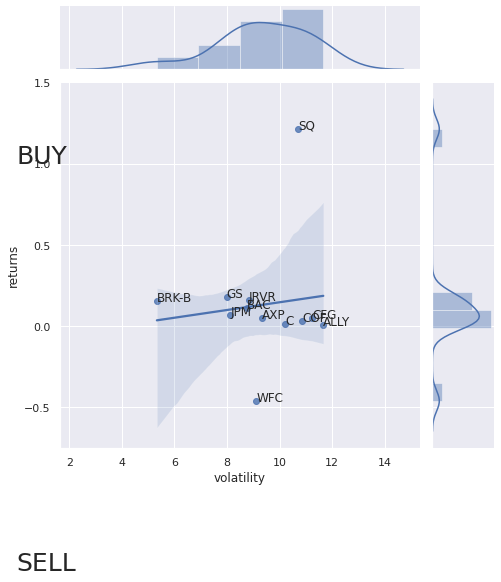

In [52]:
g = sns.jointplot("volatility", "returns", data=combine, kind="reg",height=7)

for i in range(combine.shape[0]):
    plt.annotate(directory_names[i].replace('.csv',''), (combine.iloc[i, 1], combine.iloc[i, 0]))
    
plt.text(0, -1.5, 'SELL', fontsize=25)
plt.text(0, 1.0, 'BUY', fontsize=25)
    
plt.show()